In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
# Import the SparkSession module
# from pyspark.sql import SparkSession

# Create a SparkSession
# spark = SparkSession.builder.appName("LoadData").getOrCreate()

# Load the CSV file into a DataFrame
df = spark.read.csv("/content/phishing.csv", header=True, inferSchema=True)

# Show the first 5 rows of the DataFrame
# df.show(5)

In [ ]:
#Shape of dataframe
# Get the number of rows in the DataFrame
num_rows = df.count()

# Get the list of column names
column_names = df.columns

# Print the shape of the DataFrame
print("Shape of DataFrame: ({}, {})".format(num_rows, len(column_names)))

Shape of DataFrame: (11054, 32)


In [ ]:
df.columns

['Index',
 'UsingIP',
 'LongURL',
 'ShortURL',
 'Symbol@',
 'Redirecting//',
 'PrefixSuffix-',
 'SubDomains',
 'HTTPS',
 'DomainRegLen',
 'Favicon',
 'NonStdPort',
 'HTTPSDomainURL',
 'RequestURL',
 'AnchorURL',
 'LinksInScriptTags',
 'ServerFormHandler',
 'InfoEmail',
 'AbnormalURL',
 'WebsiteForwarding',
 'StatusBarCust',
 'DisableRightClick',
 'UsingPopupWindow',
 'IframeRedirection',
 'AgeofDomain',
 'DNSRecording',
 'WebsiteTraffic',
 'PageRank',
 'GoogleIndex',
 'LinksPointingToPage',
 'StatsReport',
 'class']

In [ ]:
#Information about the dataset

# df.info()

# Print the schema of the DataFrame
df.printSchema()

root
 |-- Index: integer (nullable = true)
 |-- UsingIP: integer (nullable = true)
 |-- LongURL: integer (nullable = true)
 |-- ShortURL: integer (nullable = true)
 |-- Symbol@: integer (nullable = true)
 |-- Redirecting//: integer (nullable = true)
 |-- PrefixSuffix-: integer (nullable = true)
 |-- SubDomains: integer (nullable = true)
 |-- HTTPS: integer (nullable = true)
 |-- DomainRegLen: integer (nullable = true)
 |-- Favicon: integer (nullable = true)
 |-- NonStdPort: integer (nullable = true)
 |-- HTTPSDomainURL: integer (nullable = true)
 |-- RequestURL: integer (nullable = true)
 |-- AnchorURL: integer (nullable = true)
 |-- LinksInScriptTags: integer (nullable = true)
 |-- ServerFormHandler: integer (nullable = true)
 |-- InfoEmail: integer (nullable = true)
 |-- AbnormalURL: integer (nullable = true)
 |-- WebsiteForwarding: integer (nullable = true)
 |-- StatusBarCust: integer (nullable = true)
 |-- DisableRightClick: integer (nullable = true)
 |-- UsingPopupWindow: integer 

In [ ]:
# nunique value in columns

# df.nunique()

# Get an approximate count of distinct values for each column in the DataFrame
for column in df.columns:
    n_distinct = df.approxQuantile(column, [0.01, 0.99], 0.25)
    print("Column '{}': {} distinct values".format(column, n_distinct[1] - n_distinct[0]))

Column 'Index': 11053.0 distinct values
Column 'UsingIP': 2.0 distinct values
Column 'LongURL': 2.0 distinct values
Column 'ShortURL': 2.0 distinct values
Column 'Symbol@': 2.0 distinct values
Column 'Redirecting//': 2.0 distinct values
Column 'PrefixSuffix-': 2.0 distinct values
Column 'SubDomains': 2.0 distinct values
Column 'HTTPS': 2.0 distinct values
Column 'DomainRegLen': 2.0 distinct values
Column 'Favicon': 2.0 distinct values
Column 'NonStdPort': 2.0 distinct values
Column 'HTTPSDomainURL': 2.0 distinct values
Column 'RequestURL': 2.0 distinct values
Column 'AnchorURL': 2.0 distinct values
Column 'LinksInScriptTags': 2.0 distinct values
Column 'ServerFormHandler': 2.0 distinct values
Column 'InfoEmail': 2.0 distinct values
Column 'AbnormalURL': 2.0 distinct values
Column 'WebsiteForwarding': 1.0 distinct values
Column 'StatusBarCust': 2.0 distinct values
Column 'DisableRightClick': 2.0 distinct values
Column 'UsingPopupWindow': 2.0 distinct values
Column 'IframeRedirection': 2

In [ ]:
#droping index column

# df = df.drop('Index')

# Get the summary statistics for the DataFrame
description = df.describe().toPandas().transpose()

# Print the summary statistics
print(description)

                         0                     1                    2    3  \
summary              count                  mean               stddev  min   
Index                11054                5526.5   3191.1592721141324    0   
UsingIP              11054    0.3139135154695133   0.9494945300528439   -1   
LongURL              11054   -0.6333453953320065   0.7659725279822419   -1   
ShortURL             11054    0.7387371087389181    0.674024171075134   -1   
Symbol@              11054    0.7005608829383029   0.7136249151651995   -1   
Redirecting//        11054    0.7416319884204813   0.6708373163823087   -1   
PrefixSuffix-        11054   -0.7349375791568663    0.678165437299989   -1   
SubDomains           11054   0.06404921295458657   0.8174924841058423   -1   
HTTPS                11054    0.2510403473855618   0.9118559757697028   -1   
DomainRegLen         11054  -0.33671069296182377   0.9416507447594096   -1   
Favicon              11054    0.6285507508594174   0.77780375608

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

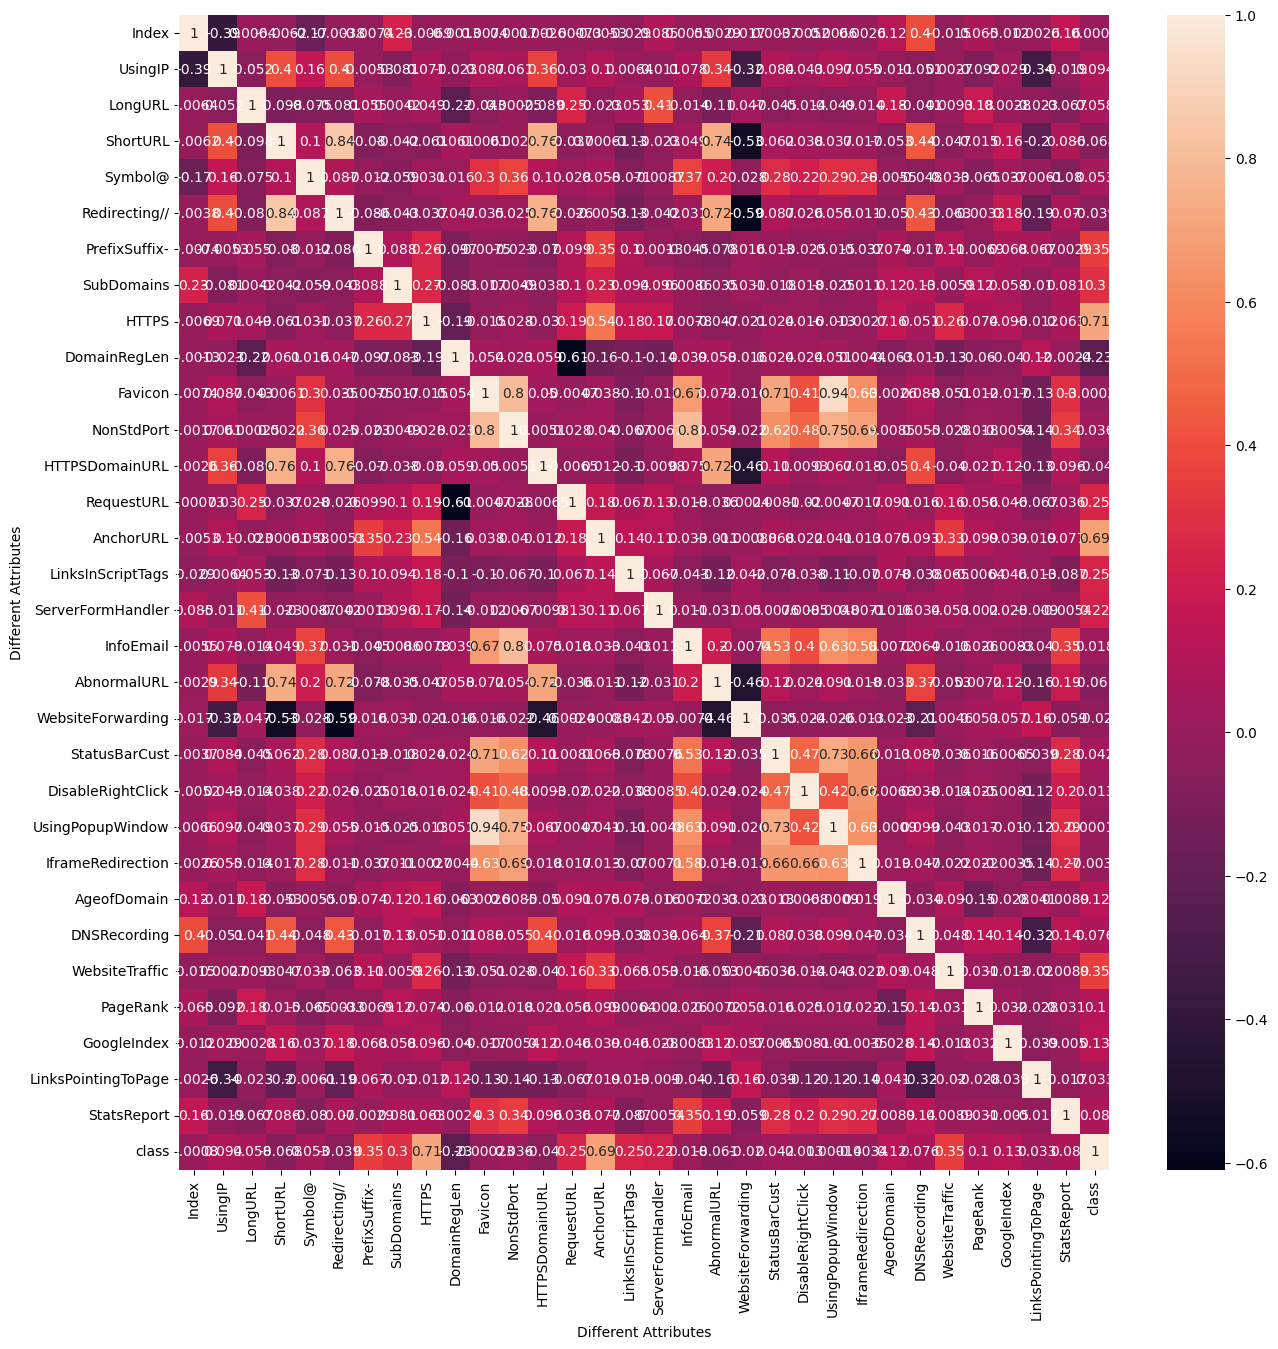

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Spark DataFrame to a Pandas DataFrame
df_pd = df.toPandas()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(15,15))
sns.heatmap(df_pd.corr(), annot=True)
plt.xlabel('Different Attributes')
plt.ylabel('Different Attributes')
plt.show()

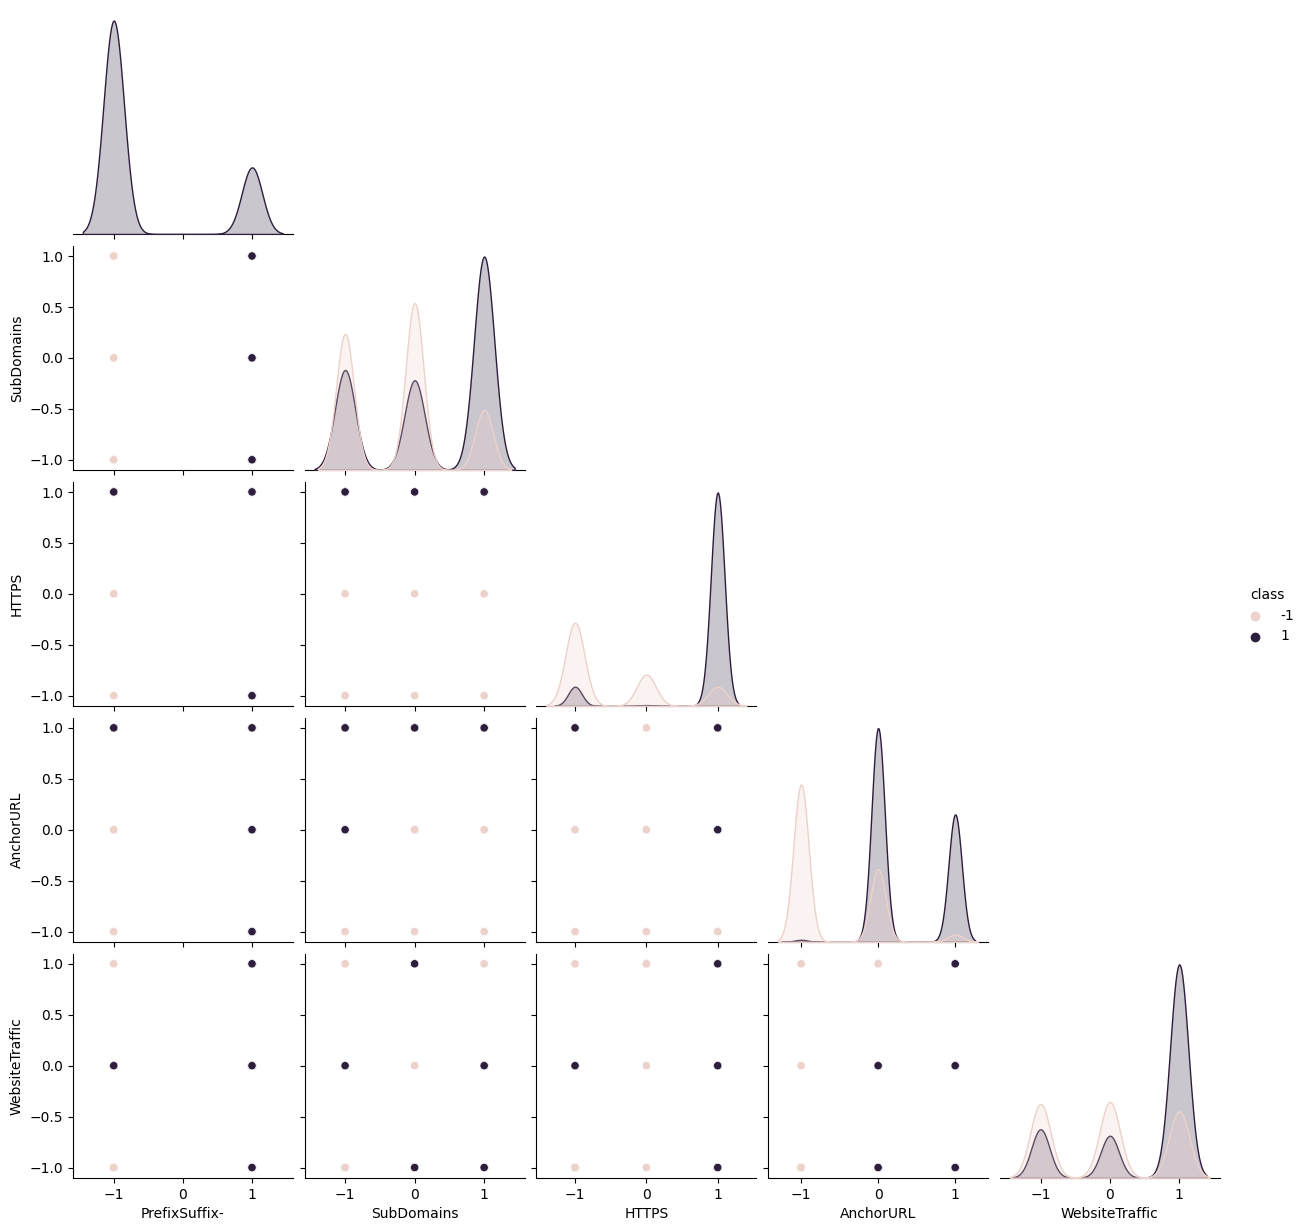

In [ ]:
# Select the columns of interest
df_select = df.select("PrefixSuffix-", "SubDomains", "HTTPS", "AnchorURL", "WebsiteTraffic", "class")

# Convert the Spark DataFrame to a Pandas DataFrame
df_pd = df_select.toPandas()

# Create a pairplot using Seaborn
sns.pairplot(data=df_pd, hue="class", corner=True)

# Show the plot
# plt.show()

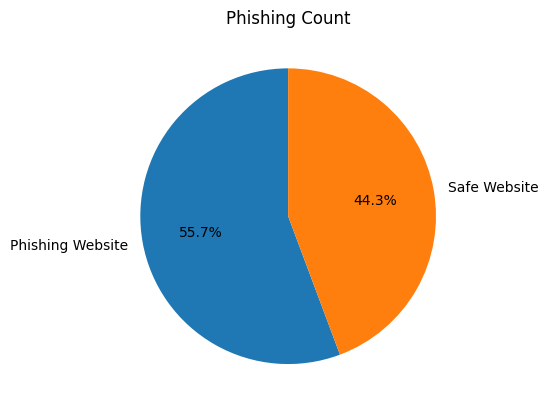

In [ ]:
import matplotlib.pyplot as plt
# Convert the Spark DataFrame to a Pandas DataFrame
df_pd = df.toPandas()


# Define the data
cnt1=df_pd['class'].value_counts()[1]
cnt_1=df_pd['class'].value_counts()[-1]
labels = ['Phishing Website', 'Safe Website']
sizes = [cnt1, cnt_1]

# Create the plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Phishing Count")

# Show the plot
plt.show()


In [ ]:
# Split the DataFrame into independent and dependent features
# X = df.drop("class")
# y = df.select("class")

# Rename the "class" column to "label"
# df = df.withColumnRenamed("`class`", "class")

# df.columns

In [ ]:
df.columns

['Index',
 'UsingIP',
 'LongURL',
 'ShortURL',
 'Symbol@',
 'Redirecting//',
 'PrefixSuffix-',
 'SubDomains',
 'HTTPS',
 'DomainRegLen',
 'Favicon',
 'NonStdPort',
 'HTTPSDomainURL',
 'RequestURL',
 'AnchorURL',
 'LinksInScriptTags',
 'ServerFormHandler',
 'InfoEmail',
 'AbnormalURL',
 'WebsiteForwarding',
 'StatusBarCust',
 'DisableRightClick',
 'UsingPopupWindow',
 'IframeRedirection',
 'AgeofDomain',
 'DNSRecording',
 'WebsiteTraffic',
 'PageRank',
 'GoogleIndex',
 'LinksPointingToPage',
 'StatsReport',
 'class']

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
# Combine the independent features into a single vector column
# from pyspark.ml.feature import VectorAssembler

# # Combine the independent features into a single vector column
# assembler = VectorAssembler(inputCols=X.columns, outputCol="features")
# data = assembler.transform(X)
# # data.show()
# # Split the data into training and testing sets
# train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting            

The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []


def storeResults(model, a):
  ML_Model.append(model)
  accuracy.append(a)

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("PhishingWebsiteDetection").getOrCreate()

# Load the dataset into a DataFrame
phishing_df = spark.read.format("csv").option("header", "true").load("/content/phishing.csv")
# phishing_df.columns


In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

# Convert the categorical features into numerical ones
indexer = StringIndexer(inputCols=[
 'UsingIP',
 'LongURL',
 'ShortURL',
 'Symbol@',
 'Redirecting//',
 'PrefixSuffix-',
 'SubDomains',
 'HTTPS',
 'DomainRegLen',
 'Favicon',
 'NonStdPort',
 'HTTPSDomainURL',
 'RequestURL',
 'AnchorURL',
 'LinksInScriptTags',
 'ServerFormHandler',
 'InfoEmail',
 'AbnormalURL',
 'WebsiteForwarding',
 'StatusBarCust',
 'DisableRightClick',
 'UsingPopupWindow',
 'IframeRedirection',
 'AgeofDomain',
 'DNSRecording',
 'WebsiteTraffic',
 'PageRank',
 'GoogleIndex',
 'LinksPointingToPage',
 'StatsReport',
 'class'], outputCols=[
 'UsingIP_',
 'LongURL_',
 'ShortURL_',
 'Symbol@_',
 'Redirecting//_',
 'PrefixSuffix-_',
 'SubDomains_',
 'HTTPS_',
 'DomainRegLen_',
 'Favicon_',
 'NonStdPort_',
 'HTTPSDomainURL_',
 'RequestURL_',
 'AnchorURL_',
 'LinksInScriptTags_',
 'ServerFormHandler_',
 'InfoEmail_',
 'AbnormalURL_',
 'WebsiteForwarding_',
 'StatusBarCust_',
 'DisableRightClick_',
 'UsingPopupWindow_',
 'IframeRedirection_',
 'AgeofDomain_',
 'DNSRecording_',
 'WebsiteTraffic_',
 'PageRank_',
 'GoogleIndex_',
 'LinksPointingToPage_',
 'StatsReport_', 'class_'])
assembler = VectorAssembler(inputCols=[
 'UsingIP_',
 'LongURL_',
 'ShortURL_',
 'Symbol@_',
 'Redirecting//_',
 'PrefixSuffix-_',
 'SubDomains_',
 'HTTPS_',
 'DomainRegLen_',
 'Favicon_',
 'NonStdPort_',
 'HTTPSDomainURL_',
 'RequestURL_',
 'AnchorURL_',
 'LinksInScriptTags_',
 'ServerFormHandler_',
 'InfoEmail_',
 'AbnormalURL_',
 'WebsiteForwarding_',
 'StatusBarCust_',
 'DisableRightClick_',
 'UsingPopupWindow_',
 'IframeRedirection_',
 'AgeofDomain_',
 'DNSRecording_',
 'WebsiteTraffic_',
 'PageRank_',
 'GoogleIndex_',
 'LinksPointingToPage_',
 'StatsReport_'], outputCol="features")
pipeline = Pipeline(stages=[indexer, assembler])
processed_df = pipeline.fit(phishing_df).transform(phishing_df)

# Split the dataset into training and testing sets
(training_df, testing_df) = processed_df.randomSplit([0.7, 0.3], seed=42)


In [ ]:
# Train a logistic regression model
lr = LogisticRegression(featuresCol="features", labelCol="class_")
model = lr.fit(training_df)

# Make predictions on the testing set
predictions = model.transform(testing_df)

# Evaluate the performance of the model using the AUC metric
evaluator = BinaryClassificationEvaluator(labelCol="class_", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print("AUC: ", auc)
storeResults('Logistic Regression', auc)


AUC:  0.9684508987627428


In [ ]:
# !pip install --upgrade pyspark

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [ ]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Split the dataset into training and testing sets
# (training_df, testing_df) = processed_df.randomSplit([0.7, 0.3], seed=42)

# Train the SVM classifier
svm = LinearSVC(labelCol="class_", featuresCol="features")
svm_model = svm.fit(training_df)

# Make predictions on the testing set
svm_predictions = svm_model.transform(testing_df)

# Evaluate the performance of the SVM classifier
svm_evaluator = BinaryClassificationEvaluator(labelCol="class_")
svm_accuracy = svm_evaluator.evaluate(svm_predictions)
print("Accuracy of SVM classifier:", svm_accuracy)
storeResults('Support Vector Machine', svm_accuracy)


Accuracy of SVM classifier: 0.9663561201462928


## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Split the dataset into training and testing sets
# (training_df, testing_df) = processed_df.randomSplit([0.7, 0.3], seed=42)

# Train the Naive Bayes classifier
nb = NaiveBayes(labelCol="class_", featuresCol="features")
nb_model = nb.fit(training_df)

# Make predictions on the testing set
nb_predictions = nb_model.transform(testing_df)

# Evaluate the performance of the Naive Bayes classifier
nb_evaluator = BinaryClassificationEvaluator(labelCol="class_")
nb_accuracy = nb_evaluator.evaluate(nb_predictions)
print("Accuracy of Naive Bayes classifier:", nb_accuracy)
storeResults('Naive Bayes', nb_accuracy)

Accuracy of Naive Bayes classifier: 0.4448854174772395


## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Split the dataset into training and testing sets
# (training_df, testing_df) = processed_df.randomSplit([0.7, 0.3], seed=42)

# Train the Decision Tree classifier
dt = DecisionTreeClassifier(labelCol="class_", featuresCol="features", maxBins=11055)
dt_model = dt.fit(training_df)

# Make predictions on the testing set
dt_predictions = dt_model.transform(testing_df)

# Evaluate the performance of the Decision Tree classifier
dt_evaluator = BinaryClassificationEvaluator(labelCol="class_")
dt_accuracy = dt_evaluator.evaluate(dt_predictions)
print("Accuracy of Decision Tree classifier:", dt_accuracy)
storeResults('Decision Trees', dt_accuracy)

Accuracy of Decision Tree classifier: 0.9615491012372578


## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Split the dataset into training and testing sets
# (training_df, testing_df) = processed_df.randomSplit([0.7, 0.3], seed=42)

# Train the Random Forest classifier
rf = RandomForestClassifier(labelCol="class_", featuresCol="features", numTrees=100)
rf_model = rf.fit(training_df)

# Make predictions on the testing set
rf_predictions = rf_model.transform(testing_df)

# Evaluate the performance of the Random Forest classifier
rf_evaluator = BinaryClassificationEvaluator(labelCol="class_")
rf_accuracy = rf_evaluator.evaluate(rf_predictions)
print("Accuracy of Random Forest classifier:", rf_accuracy)
storeResults('Random Forest', rf_accuracy)

Accuracy of Random Forest classifier: 0.9803879075558328


In [ ]:
# training_df.show(5)
# features=training_df.drop('Index', 'class_', 'features')
# features.show(5)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Split the dataset into training and testing sets
(training_df, testing_df) = processed_df.randomSplit([0.7, 0.3], seed=42)

# Train the Gradient Boosted Tree classifier
gbt = GBTClassifier(labelCol="class_", featuresCol="features", maxIter=100, maxDepth=5, stepSize=0.1)
gbt_model = gbt.fit(training_df)

# Make predictions on the testing set
gbt_predictions = gbt_model.transform(testing_df)

# Evaluate the performance of the Gradient Boosted Tree classifier
gbt_evaluator = BinaryClassificationEvaluator(labelCol="class_")
gbt_accuracy = gbt_evaluator.evaluate(gbt_predictions)
print("Accuracy of Gradient Boosted Tree classifier:", gbt_accuracy)
storeResults('Gradient Boosting Classifier', gbt_accuracy)

Accuracy of Gradient Boosted Tree classifier: 0.9933061629445192


## 5.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


---



In [ ]:
# Import necessary libraries
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load dataset
# phishing_data = spark.read.csv("phishing_dataset.csv", header=True, inferSchema=True)

# Split data into training and test datasets
# (training_data, test_data) = phishing_data.randomSplit([0.7, 0.3], seed=100)

# Define the layers for the neural network:
# Input layer: 30 features, hidden layer 1: 10 neurons, hidden layer 2: 5 neurons, output layer: 2 classes (0 or 1)
layers = [30, 10, 5, 2]

# Create the Multilayer Perceptron Classifier object
mlp = MultilayerPerceptronClassifier(labelCol="class_", featuresCol="features", maxIter=100, layers=layers, blockSize=128, seed=1234)

# Train the model
mlp_model = mlp.fit(training_df)

# Make predictions on test data
predictions = mlp_model.transform(testing_df)

# Evaluate the accuracy of the model
evaluator = MulticlassClassificationEvaluator(labelCol="class_", predictionCol="prediction", metricName="accuracy")
mlp_accuracy = evaluator.evaluate(predictions)
print("Accuracy: ", mlp_accuracy)
# storeResults('Multi-layer Perceptron', accuracy)

Accuracy:  0.9520123839009288


## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
import pandas as pd
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy
                      })

result

,ML Model,Accuracy
0,Logistic Regression,0.968451
1,Support Vector Machine,0.966356
2,Naive Bayes,0.444885
3,Decision Trees,0.961549
4,Random Forest,0.980388
5,Gradient Boosting Classifier,0.993306


In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)
# dispalying total result
sorted_result

,ML Model,Accuracy
0,Gradient Boosting Classifier,0.993306
1,Random Forest,0.980388
2,Logistic Regression,0.968451
3,Support Vector Machine,0.966356
4,Decision Trees,0.961549
5,Naive Bayes,0.444885


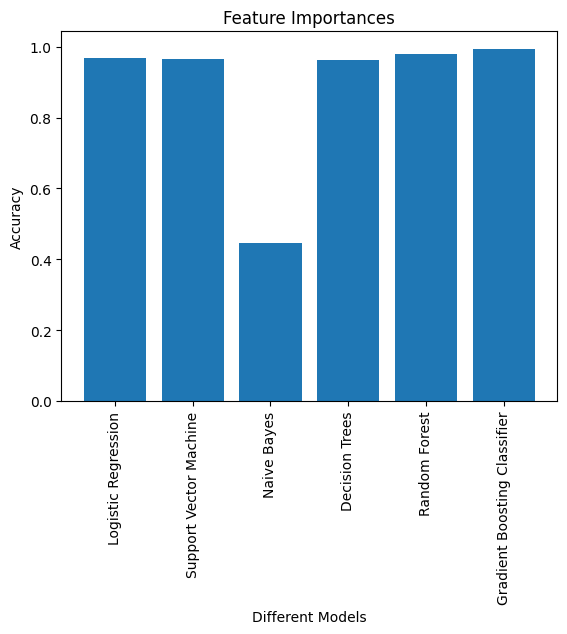

In [ ]:
import matplotlib.pyplot as plt

# feature_importance = gbt_model.stages[-1].featureImportances.toArray()
# feature_importance = gbt_model.featureImportances
# feature_names = df.columns[:-1] # assuming the last column is the label
# feature_names=feature_columns

# plot the feature importances
plt.bar(ML_Model, accuracy)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.xlabel('Different Models')
plt.ylabel('Accuracy')
plt.show()


## Storing Best Model

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Split the dataset into training and testing sets
# (training_df, testing_df) = processed_df.randomSplit([0.7, 0.3], seed=42)

# Train the Gradient Boosted Tree classifier
gbt = GBTClassifier(labelCol="class_", featuresCol="features", maxIter=100, maxDepth=5, stepSize=0.1)
gbt_model = gbt.fit(training_df)
# gbt_model.save('model')


In [ ]:
# Get feature importance scores
# importances = gbt_model.featureImportances

# # Print feature importance scores
# for i, imp in enumerate(importances):
#     print("Feature ", i+1, " importance score: ", imp)

# Extract feature importances
importances = gbt_model.featureImportances.toArray()

# Display feature importances
for i in range(len(importances)):
    print("Feature {}: {:.3f}".format(i, importances[i]))

Feature 0: 0.027
Feature 1: 0.008
Feature 2: 0.006
Feature 3: 0.003
Feature 4: 0.007
Feature 5: 0.027
Feature 6: 0.049
Feature 7: 0.356
Feature 8: 0.009
Feature 9: 0.002
Feature 10: 0.001
Feature 11: 0.010
Feature 12: 0.018
Feature 13: 0.199
Feature 14: 0.062
Feature 15: 0.037
Feature 16: 0.005
Feature 17: 0.005
Feature 18: 0.005
Feature 19: 0.006
Feature 20: 0.006
Feature 21: 0.005
Feature 22: 0.003
Feature 23: 0.016
Feature 24: 0.017
Feature 25: 0.044
Feature 26: 0.008
Feature 27: 0.018
Feature 28: 0.040
Feature 29: 0.001


## Showing features importance vector

In [ ]:
# Get the feature importance vector
importance_vector = gbt_model.featureImportances

# features=training_df.drop('Index', 'class_', 'features')
# features.show(5)

feature_columns=[
 'UsingIP_',
 'LongURL_',
 'ShortURL_',
 'Symbol@_',
 'Redirecting//_',
 'PrefixSuffix-_',
 'SubDomains_',
 'HTTPS_',
 'DomainRegLen_',
 'Favicon_',
 'NonStdPort_',
 'HTTPSDomainURL_',
 'RequestURL_',
 'AnchorURL_',
 'LinksInScriptTags_',
 'ServerFormHandler_',
 'InfoEmail_',
 'AbnormalURL_',
 'WebsiteForwarding_',
 'StatusBarCust_',
 'DisableRightClick_',
 'UsingPopupWindow_',
 'IframeRedirection_',
 'AgeofDomain_',
 'DNSRecording_',
 'WebsiteTraffic_',
 'PageRank_',
 'GoogleIndex_',
 'LinksPointingToPage_',
 'StatsReport_']

# Create a pandas dataframe to store feature names and importance values
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': importance_vector.toArray()})

# Sort the dataframe by importance values in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the dataframe to see feature names and their importance values
print(importance_df)

                 Feature  Importance
7                 HTTPS_    0.356463
13            AnchorURL_    0.199264
14    LinksInScriptTags_    0.061634
6            SubDomains_    0.048956
25       WebsiteTraffic_    0.043661
28  LinksPointingToPage_    0.039785
15    ServerFormHandler_    0.036829
0               UsingIP_    0.027330
5         PrefixSuffix-_    0.026590
27          GoogleIndex_    0.018241
12           RequestURL_    0.017982
24         DNSRecording_    0.017451
23          AgeofDomain_    0.016455
11       HTTPSDomainURL_    0.010077
8          DomainRegLen_    0.008721
1               LongURL_    0.008458
26             PageRank_    0.007832
4         Redirecting//_    0.007201
2              ShortURL_    0.005991
20    DisableRightClick_    0.005868
19        StatusBarCust_    0.005667
18    WebsiteForwarding_    0.004808
17          AbnormalURL_    0.004801
16            InfoEmail_    0.004670
21     UsingPopupWindow_    0.004658
22    IframeRedirection_    0.002972
3

## Ploting features importance

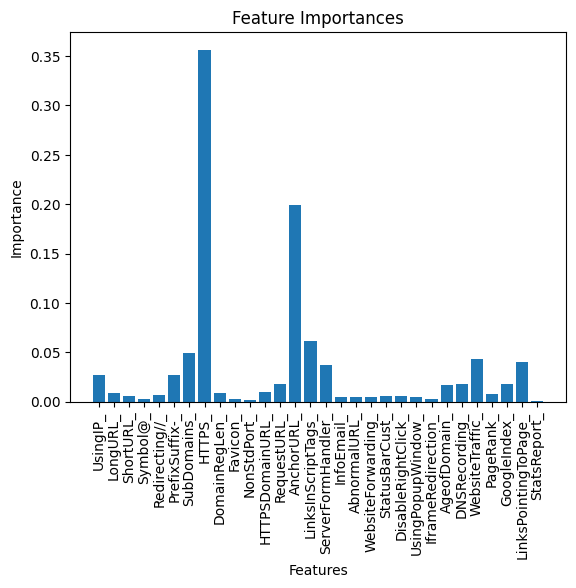

In [ ]:
import matplotlib.pyplot as plt

# feature_importance = gbt_model.stages[-1].featureImportances.toArray()
feature_importance = gbt_model.featureImportances
# feature_names = df.columns[:-1] # assuming the last column is the label
feature_names=feature_columns

# plot the feature importances
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
